In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('c:/bd092_data/ozone.csv')
df.info()
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [9]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


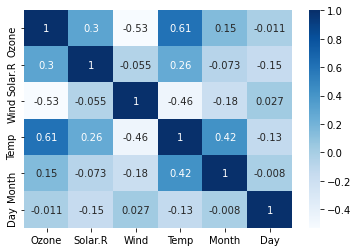

In [12]:
import seaborn as sns

df.corr()
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [17]:
x = df[['Solar.R', 'Wind', 'Temp']]
y = df['Ozone']
import statsmodels.api as sm
x1 = sm.add_constant(x, has_constant='add')
multi_model = sm.OLS(y, x1).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     45.85
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           4.73e-21
Time:                        23:28:44   Log-Likelihood:                -680.14
No. Observations:                 153   AIC:                             1368.
Df Residuals:                     149   BIC:                             1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.2232     18.883     -2.024      0.045     -75.537      -0.909
Solar.R        0.0577      0.020      2.883      0.005       0.018       0.097
Wind          -2.7173      0.543     -5.006      0.000      -3.790      -1.645
Temp           1.2413      0.209      5.937      0.000       0.828       1.654
==============================================================================
Omnibus:                       50.473   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.388
Skew:                           1.378   Prob(JB):                     1.61e-27
Kurtosis:                       6.429   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

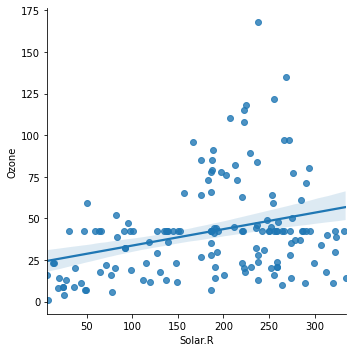

In [18]:
sns.lmplot(y='Ozone', x='Solar.R', data=df)

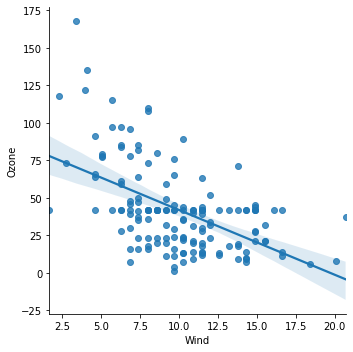

In [19]:
sns.lmplot(y='Ozone', x='Wind', data=df)

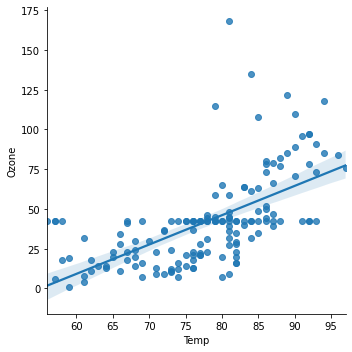

In [20]:
sns.lmplot(y='Ozone', x='Temp', data=df)